# Refinamiento del modelo Gempy

In [ ]:
import gempy as gp
import gempy_viewer as gpv
import numpy as np
from gempy_engine.core.data.stack_relation_type import StackRelationType

data = gp.create_geomodel(
    project_name='Eastern_Cordillera',
    extent = [1145325, 1156475, 1165000, 1166800, 1000, 3000],
    resolution = [446, 72, 200], 
    #resolution=[64, 64, 64],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations="FINAL_orientations.csv",
        path_to_surface_points="FINAL_surface.csv"
    )
)

gp.map_stack_to_surfaces(
    gempy_model=data,
    mapping_object={
        "Fault_Series": ('Fault1'),
        "Strat_Series": ('T5','T4','T3','T2','T1', 'T',
                         'K5', 'K4', 'K3', 'K2', 'K1', 'K',
                         'J', 'P', 'D')
    }
)

gp.set_is_fault(
    frame=data.structural_frame,
    fault_groups=['Fault_Series']
)

#data.structural_frame.structural_groups[0].structural_relation = StackRelationType.FAULT
data.structural_frame.fault_relations = np.array([[0, 1], [0, 0]])

geo_data = data

gp.set_topography_from_random(
    grid=geo_data.grid,
    fractal_dimension=2.0,
    d_z=np.array([2500, 3000]),  # Rango de elevaciones aleatorias
    topography_resolution=np.array([500, 500])  # Resolución de la malla XY para la topografía
)

gp.compute_model(geo_data)

Active grids: GridTypes.DENSE|TOPOGRAPHY|NONE
Setting Backend To: AvailableBackends.numpy
Chunking done: 241 chunks


/home/pc-2/Documents/CAVE_minciencias/gempy_model/gempy_venv/lib/python3.12/site-packages/gempy_engine/modules/activator/_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 1989 chunks
Chunking done: 10 chunks


/home/pc-2/Documents/CAVE_minciencias/gempy_model/gempy_venv/lib/python3.12/site-packages/gempy_engine/modules/activator/_soft_segment.py:95: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + bt.t.exp(x))


Chunking done: 12 chunks


Solutions(4 Octree Levels, 16 DualContouringMeshes)

/home/pc-2/Documents/CAVE_minciencias/gempy_model/gempy_venv/lib/python3.12/site-packages/gempy_viewer/API/_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


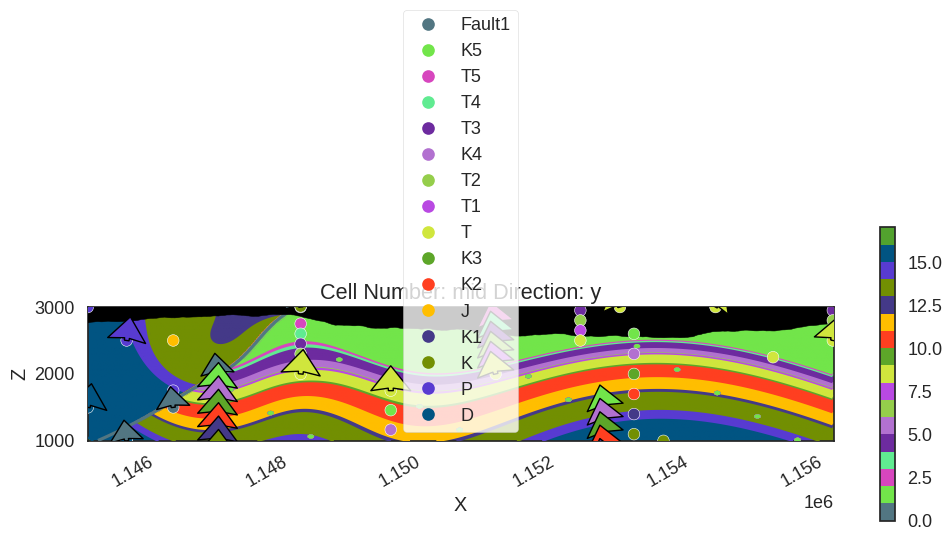

In [ ]:
gpv.plot_2d(geo_data, show_topography=True)

/tmp/ipykernel_64479/693678944.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


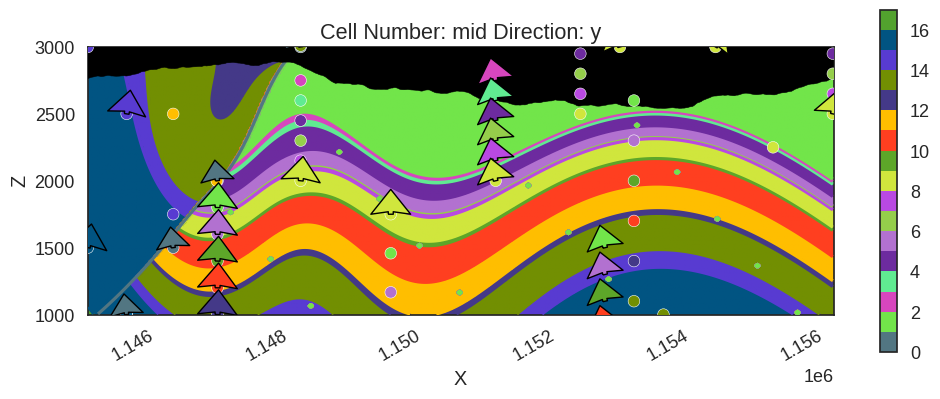

In [ ]:
import matplotlib.pyplot as plt

fig = gpv.plot_2d(geo_data, direction='y', show_data=True, show_topography=True)

ax = fig.axes[0]  # Obtener el primer eje del gráfico
ax.set_aspect(2)  # Puedes usar un valor menor a 1 para estirar el eje Y (por ejemplo: 0.5, 0.3, etc.)

ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()

plt.show()

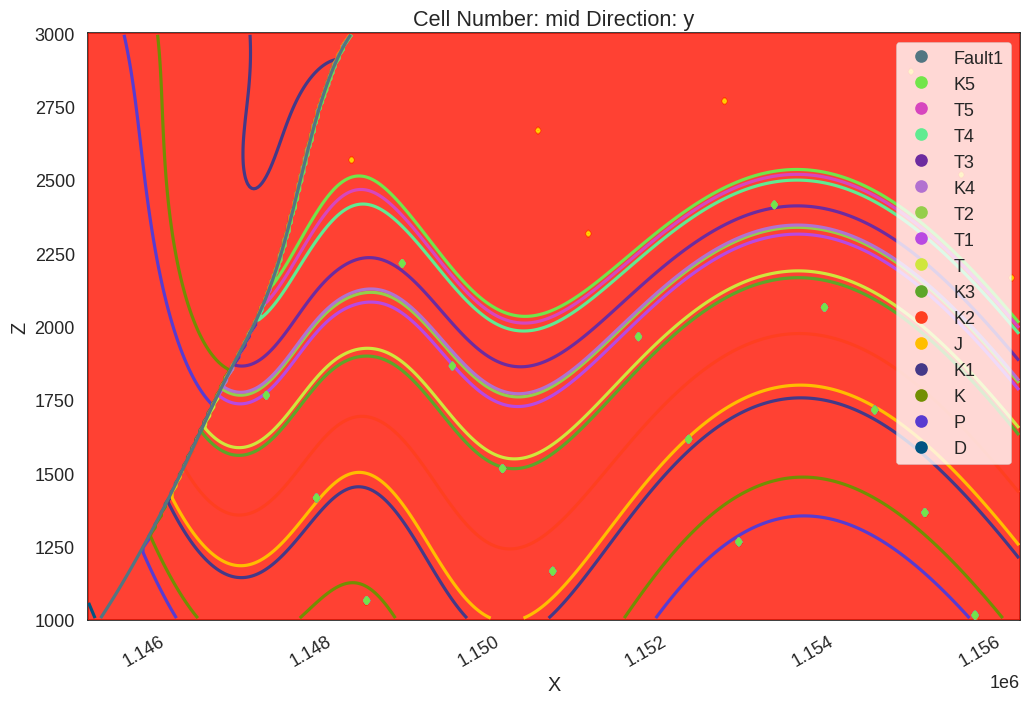

In [94]:
gpv.plot_2d(
    model=geo_data,
    series_n=1,  # This will plot the scalar field used for the stratigraphy
    show_data=False,
    show_scalar=True,
    show_lith=False
)

In [95]:
import joblib

# Guardar el objeto completo
joblib.dump(geo_data, 'modelo_gempy_topografia_25m_res_2.pkl')

['modelo_gempy_topografia_25m_res_2.pkl']